In [1]:
from pylab import *
import numpy as np
import healpy as hp
%matplotlib inline
from matplotlib import rc
rc('figure',figsize=(10,10))
rc('font',size=20)
rc('text',usetex=False)

# QUBIC Synthesized Beam
This notebook aims at showing how to obtain the QUBIC Synthesized beam for a given set of horns accounting for various effets (detector size, bandwidth...).

## Basic Instructions
### The QubicInstrument object
The basic object in QUBIC simulaiton software is called a QubicInstrument, it contains all the description of the instrument that can be easily modified upon creation of the object but for which there are default values so that it can be called with just a few arguments.

In [2]:
from qubic import QubicInstrument

/Users/hamilton/anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


Note that in the current notebook we will use a slightly modified version of the QubicInstrument that has not yet been commited on the Git repository so we have to import it specifically.

In [3]:
import myinstrument
inst = myinstrument.QubicInstrument(filter_nu=150e9)

### The QubicScene
It is also important to create an obkect called QubicScene that descibes the environmental parameters (atmosphere model when it will be avilable, pixellization of the sky, ...).

In [4]:
from qubic import QubicScene
nside = 512
scene = QubicScene(nside)

### Looking at the detector array
Once the QubicIntrument exists, it contains a lot of informations on the instrument. For instance on can easily look at the detector array:

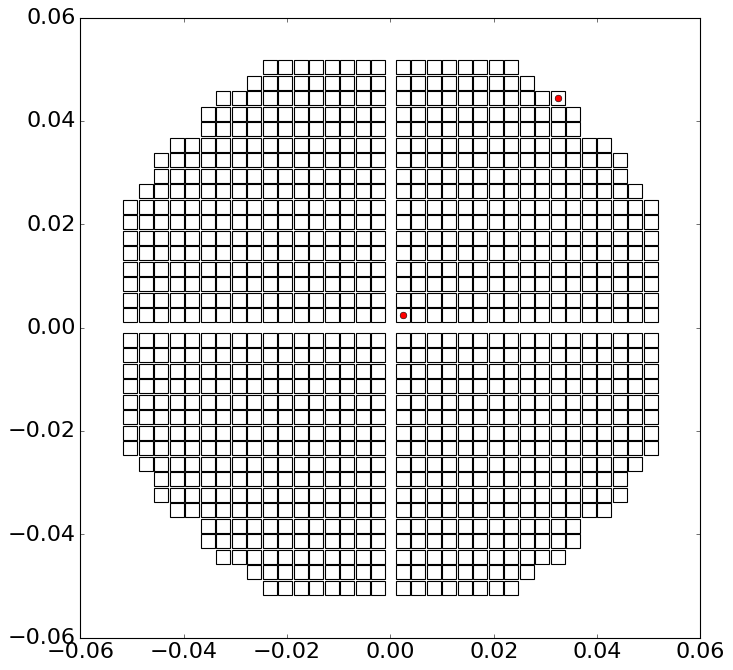

In [5]:
plot(inst.detector[231].center[0,0], inst.detector[231].center[0,1],'ro')
plot(inst.detector[27].center[0,0], inst.detector[27].center[0,1],'ro')
inst.detector.plot()

Where we have emphasized in red a detector close to the center (231) and one close to the edge of the array (27).

### Looking at the horn array
Similarly one can have access to the horn array:

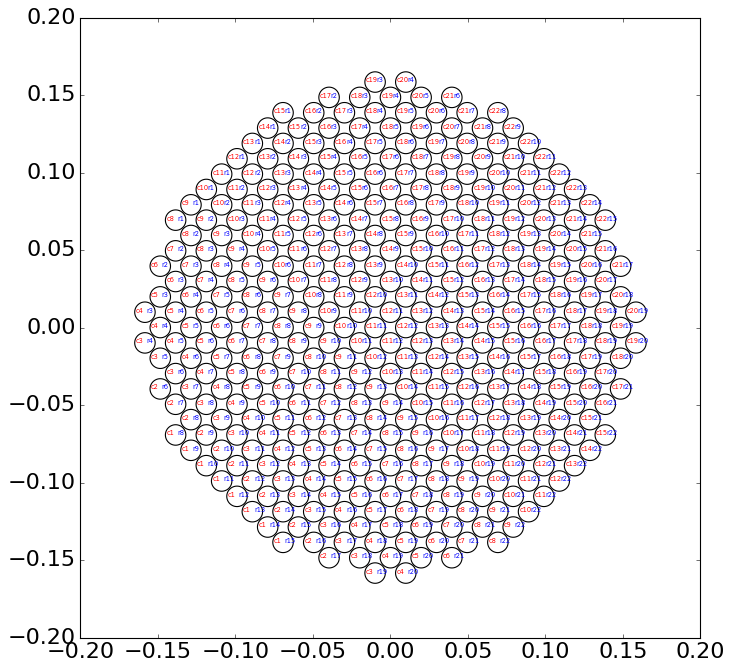

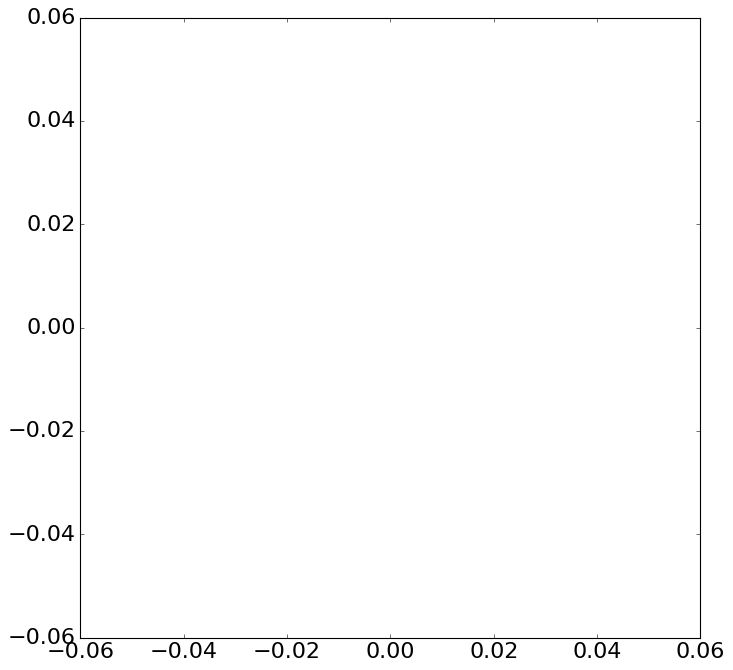

In [6]:
centers = inst.horn.center[:,0:2]
col = inst.horn.column
row = inst.horn.row
for i in xrange(len(centers)):
    text(centers[i,0]-0.006, centers[i,1], 'c{0:}'.format(col[i]), color='r',fontsize=6)
    text(centers[i,0]+0.001, centers[i,1], 'r{0:}'.format(row[i]), color='b',fontsize=6)
inst.horn.plot()

### Closing and opening horns

The inst.horn.open object returns the list of horns that are open or closed. It can be easlily modified:

In [7]:
### Horns for First Instrument
hornsFI = inst.horn.open

### Horns for TD
hornsTD = (col >= 8) & (col <= 15) & (row >= 8) & (row <= 15)


#### Now create First Instrument and TD monochromatic
instFI = myinstrument.QubicInstrument(filter_nu=150e9)
instFI.horn.open[~hornsFI] = False

instTD = myinstrument.QubicInstrument(filter_nu=150e9)
instTD.horn.open[~hornsTD] = False

## Calculating the Synthesized Beam

### Simplest case: monochromatic and point-like detectors
The QubicInstrument object has a method that calculates the synthesized beam for a given TES in the case of a perfect instrument. This means that it assumes that the amplitude and phses of the electric field from each horn in the focal plane are just the geometrical ones. The calculation is done only at the central frequency and at the center of the detector.

myinstrument.py:724: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  index_ = index[s]
/Users/hamilton/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in log10
/Users/hamilton/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: divide by zero encountered in log10


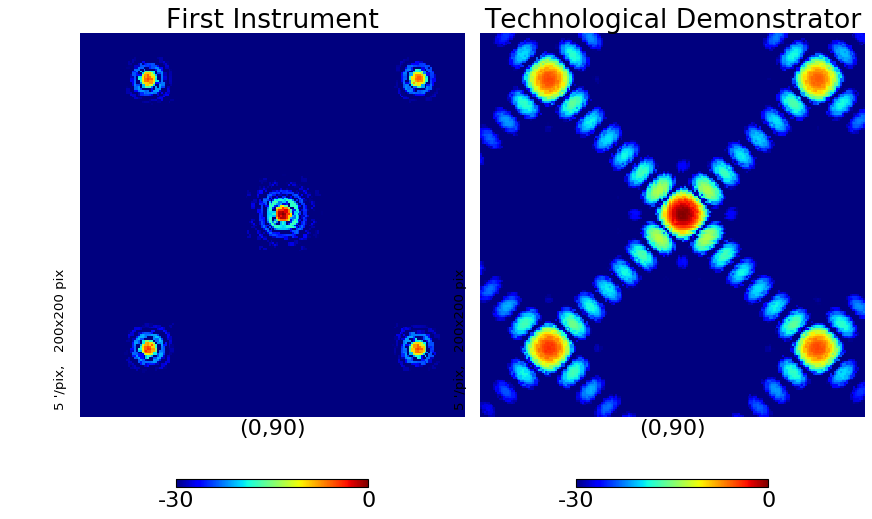

In [8]:
# Detector number
idet = 231
sbidealFI = instFI[idet].get_synthbeam(scene)[0]
sbidealTD = instTD[idet].get_synthbeam(scene)[0]

clf()
mini=-30
hp.gnomview(np.log10(sbidealFI/np.max(sbidealFI))*10, rot=[0,90], reso=5, 
	sub=(1,2,1), title='First Instrument', min=mini, max=0)
hp.gnomview(np.log10(sbidealTD/np.max(sbidealTD))*10, rot=[0,90], reso=5, 
	sub=(1,2,2), title='Technological Demonstrator', min=mini, max=0)

### Integration over the pixel area
Integration over the pixel area is implemented in the function get_synthbeam(), here with a 4x4 average over the pixel surface.

(0, 4)
(1, 4)
(2, 4)
(3, 4)
(0, 4)
(1, 4)
(2, 4)
(3, 4)


/Users/hamilton/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: divide by zero encountered in log10
/Users/hamilton/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in log10


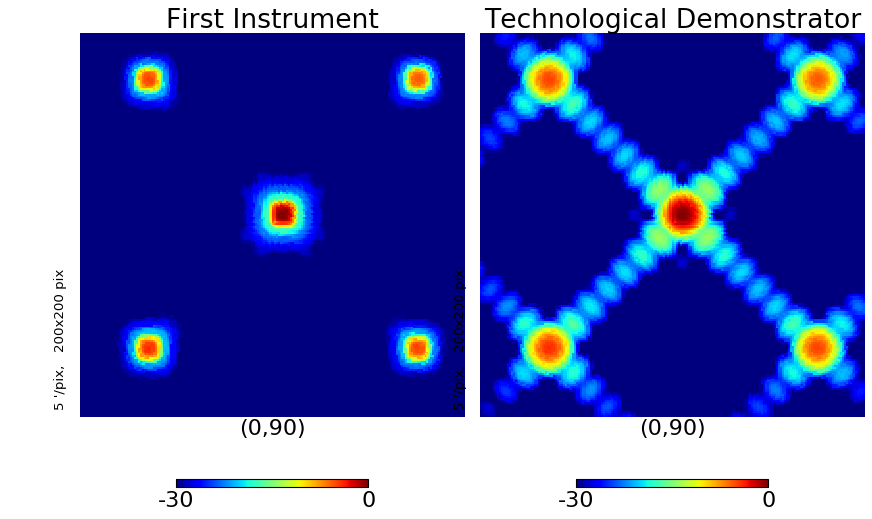

In [9]:
nsub = 4
idet = 231
sbidealFI = instFI[idet].get_synthbeam(scene, detector_integrate=nsub)[0]
sbidealTD = instTD[idet].get_synthbeam(scene, detector_integrate=nsub)[0]

figure()
clf()
mini=-30
hp.gnomview(np.log10(sbidealFI/np.max(sbidealFI))*10, rot=[0,90], reso=5, 
	sub=(1,2,1), title='First Instrument', min=mini, max=0)
hp.gnomview(np.log10(sbidealTD/np.max(sbidealTD))*10, rot=[0,90], reso=5, 
	sub=(1,2,2), title='Technological Demonstrator', min=mini, max=0)


### Integration over bandwith
Integration over badwidth is not yet implemented in the get_synthbeam() function but can be easily done outside:

nu=131.25 number 0 over 10
(0, 4)
(1, 4)
(2, 4)
(3, 4)
nu=135.416666667 number 1 over 10
(0, 4)
(1, 4)
(2, 4)
(3, 4)
nu=139.583333333 number 2 over 10
(0, 4)
(1, 4)
(2, 4)
(3, 4)
nu=143.75 number 3 over 10
(0, 4)
(1, 4)
(2, 4)
(3, 4)
nu=147.916666667 number 4 over 10
(0, 4)
(1, 4)
(2, 4)
(3, 4)
nu=152.083333333 number 5 over 10
(0, 4)
(1, 4)
(2, 4)
(3, 4)
nu=156.25 number 6 over 10
(0, 4)
(1, 4)
(2, 4)
(3, 4)
nu=160.416666667 number 7 over 10
(0, 4)
(1, 4)
(2, 4)
(3, 4)
nu=164.583333333 number 8 over 10
(0, 4)
(1, 4)
(2, 4)
(3, 4)
nu=168.75 number 9 over 10
(0, 4)
(1, 4)
(2, 4)
(3, 4)
nu=131.25 number 0 over 10
(0, 4)
(1, 4)
(2, 4)
(3, 4)
nu=135.416666667 number 1 over 10
(0, 4)
(1, 4)
(2, 4)
(3, 4)
nu=139.583333333 number 2 over 10
(0, 4)
(1, 4)
(2, 4)
(3, 4)
nu=143.75 number 3 over 10
(0, 4)
(1, 4)
(2, 4)
(3, 4)
nu=147.916666667 number 4 over 10
(0, 4)
(1, 4)
(2, 4)
(3, 4)
nu=152.083333333 number 5 over 10
(0, 4)
(1, 4)
(2, 4)
(3, 4)
nu=156.25 number 6 over 10
(0, 4)
(1, 4)
(2, 4)
(3

/Users/hamilton/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:27: RuntimeWarning: divide by zero encountered in log10
/Users/hamilton/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:31: RuntimeWarning: divide by zero encountered in log10


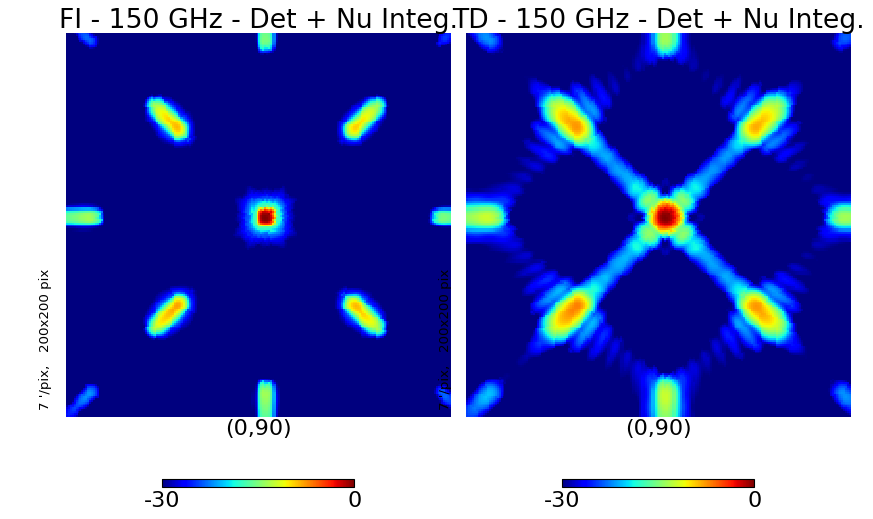

In [10]:
def getsb(hornsOK, nu0, idet, dnu_nu=None, detector_integrate=None, nsubnus = 1, nside=256):
	scene = QubicScene(nside)
	sb = np.zeros(12*nside**2)
	if dnu_nu:
		numin = nu0*(1-dnu_nu/2)
		numax = nu0*(1+dnu_nu/2)
		nuvals = linspace(numin, numax, nsubnus)
		for i in xrange(nsubnus):
			print('nu={} number {} over {}'.format(nuvals[i], i, nsubnus))
			theinst = myinstrument.QubicInstrument(filter_nu=nuvals[i]*1e9)
			theinst.horn.open[~hornsOK] = False
			sb += theinst[idet].get_synthbeam(scene, detector_integrate=detector_integrate)[0]/nsubnus
	else:
		theinst = myinstrument.QubicInstrument(filter_nu=nu0*1e9)
		theinst.horn.open[~hornsOK] = False
		sb = theinst[idet].get_synthbeam(scene, detector_integrate=detector_integrate)[0]
	return sb

nsub = 4
idet = 231
sbidealFI_150 = getsb(hornsFI, 150., idet, dnu_nu=0.25, nsubnus=10, detector_integrate=nsub, nside=nside)
sbidealTD_150 = getsb(hornsTD, 150., idet, dnu_nu=0.25, nsubnus=10, detector_integrate=nsub, nside=nside)

clf()
reso = 7.
mini=-30
mapFI = hp.gnomview(np.log10(sbidealFI_150/np.max(sbidealFI_150))*10, 
                    rot=[0,90], reso=reso, 
                    sub=(1,2,1), title='FI - 150 GHz - Det + Nu Integ.', 
                    min=mini, max=0, return_projected_map=True)
mapTD = hp.gnomview(np.log10(sbidealTD_150/np.max(sbidealTD_150))*10, 
                    rot=[0,90], reso=reso, 
                    sub=(1,2,2), title='TD - 150 GHz - Det + Nu Integ.', 
                    min=mini, max=0, return_projected_map=True)

## Studying the beam
Just for the pleasure one can study the synthesized beam resolution:

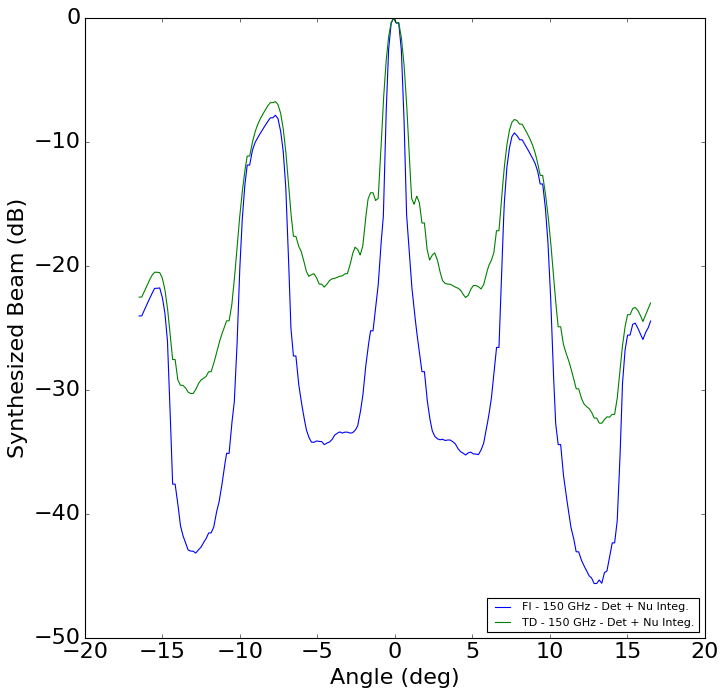

In [11]:
# location of maximum 
maxx, maxy = np.unravel_index(np.argmax(mapFI), dims=(200,200))
# diagonal cut of array shifted so that maximum is at center
initcutFI = np.diag(np.roll(np.roll(mapFI, 99-maxx, axis=0), 
                            99-maxy, axis=1))
initcutTD = np.diag(np.roll(np.roll(mapTD, 99-maxx, axis=0), 
                            99-maxy, axis=1))
## sqrt(2) comes because we take a diagonal cut
xxinit = linspace(-100,100, 200)*reso*sqrt(2)/60

# Need more points for next steps: interpolate
xx = linspace(-100,100, 20000)*reso*sqrt(2)/60
cutFI = np.interp(xx, xxinit, initcutFI)
cutTD = np.interp(xx, xxinit, initcutTD)

clf()
xlabel('Angle (deg)')
ylabel('Synthesized Beam (dB)')
plot(xx,cutFI, label = 'FI - 150 GHz - Det + Nu Integ.')
plot(xx,cutTD, label = 'TD - 150 GHz - Det + Nu Integ.')
legend(loc='lower right', fontsize=10)

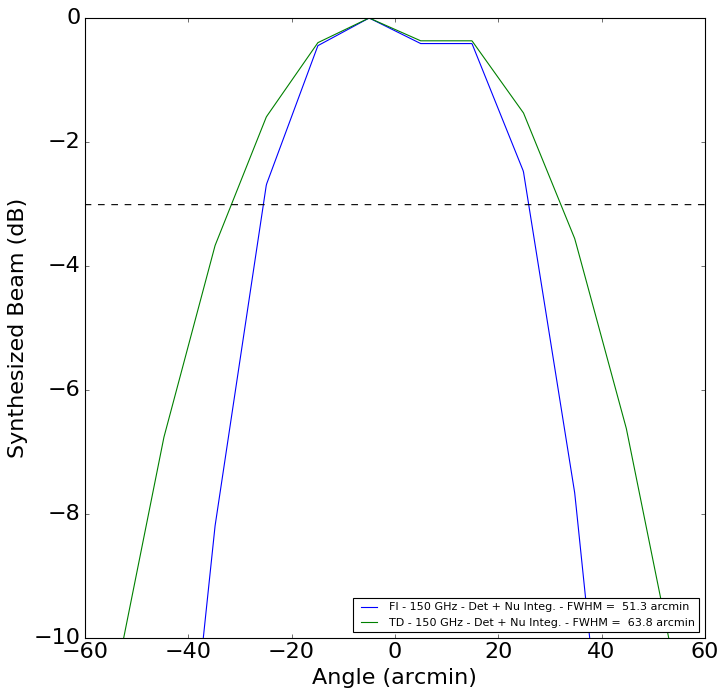

In [13]:
#### Angular resolution
halfmaxFI = cutFI > (np.log10(0.5)*10)
halfmaxTD = cutTD > (np.log10(0.5)*10)

fwhmFI = np.max(xx[halfmaxFI]*60) - np.min(xx[halfmaxFI]*60)
fwhmTD = np.max(xx[halfmaxTD]*60) - np.min(xx[halfmaxTD]*60)

clf()
xlabel('Angle (arcmin)')
ylabel('Synthesized Beam (dB)')
xlim(-60,60)
ylim(-10,0)
plot(xx*60,cutFI, label = 'FI - 150 GHz - Det + Nu Integ. - FWHM = {0:5.1f} arcmin'.format(fwhmFI))
plot(xx*60,cutTD, label = 'TD - 150 GHz - Det + Nu Integ. - FWHM = {0:5.1f} arcmin'.format(fwhmTD))
plot(xx*60, xx*0+np.log10(0.5)*10, 'k--')
legend(loc='lower right', fontsize=10)

The value of 51.3 arcmin for FI is a bit surprising so my definition of xx array should probably be checked... Maybe it's more related to the square top of the beam due to pixel integration... Needs to be somehow investigated (with higher nside for instance)

### Non ideal synthesized beam
It is also possible to provide the code with an external array for the phase and amplitude of the electric field in the focal plane for each of the horns. This kind of realistic electric field is provided by the Maynooth team.

For instance through the following (assuming that "files" is a variable that contains the filename of the 400 electric field ASCII files). 

An example of such file is given below (the files are available, just ask JCH or Créidhe):

In [14]:
import glob
rep = '/Users/hamilton/Qubic/SynthBeam/NewSimsMaynooth/QUBIC Basic/'
files = glob.glob(rep+'*.dat')

In [26]:
nn = 161
#nn = 101
xmin = -60./1000
xmax = 60./1000
ymin = -60./1000
ymax = 60./1000
xx = np.linspace(-60,60,nn)/1000
yy = np.linspace(-60,60,nn)/1000

allampX = np.zeros((400,nn,nn))
allphiX = np.zeros((400,nn,nn))
allampY = np.zeros((400,nn,nn))
allphiY = np.zeros((400,nn,nn))

#### Read the files
for i in xrange(len(files)):
    a='\r Reading files: {0:5.2f}% done'.format(i*100./(len(files)-1))
    sys.stdout.write(a)
    sys.stdout.flush()
    data = np.loadtxt(files[i], skiprows=4)
    allampX[i,:,:] = np.reshape(data[:,0],(nn,nn))
    allphiX[i,:,:] = np.reshape(data[:,1],(nn,nn))
    allampY[i,:,:] = np.reshape(data[:,2],(nn,nn))
    allphiY[i,:,:] = np.reshape(data[:,3],(nn,nn))

 Reading files: 100.00% done

Then the electric fields are formed in the following manner:

In [27]:
#### Electric field
Ax = allampX * (cos(allphiX) + 1j*sin(allphiX))
Ay = allampY * (cos(allphiY) + 1j*sin(allphiY))
external_A = [-xx, -yy, allampX, allphiX]

and the new synthesized beams would be calculated using:

In [30]:
idet = 231
sbnew = inst[idet].get_synthbeam(scene, external_A=external_A)[0]
sbideal = inst[idet].get_synthbeam(scene)[0]

and compared with the ideal one through:

/Users/hamilton/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/Users/hamilton/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log10


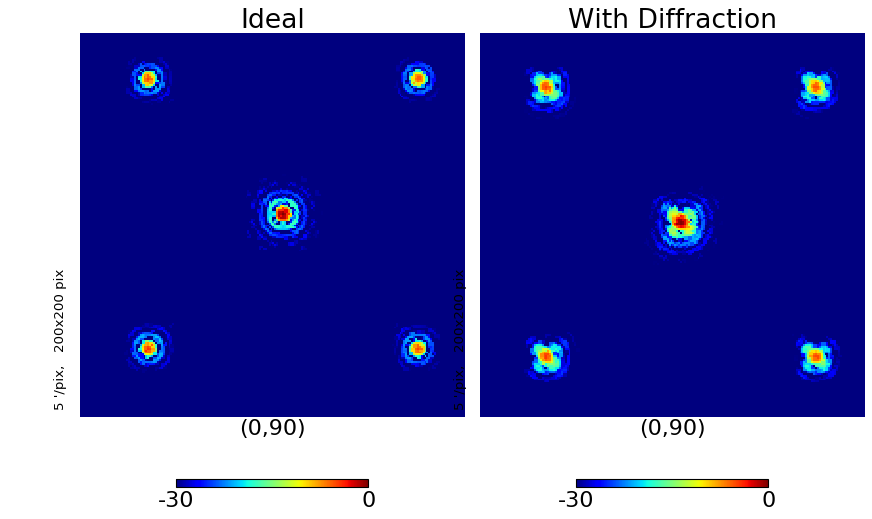

In [32]:
clf()
mini=-30
hp.gnomview(np.log10(sbideal/np.max(sbideal))*10, rot=[0,90], reso=5, 
	sub=(1,2,1), title='Ideal', min=mini, max=0)
hp.gnomview(np.log10(sbnew/np.max(sbnew))*10, rot=[0,90], reso=5, 
	sub=(1,2,2), title='With Diffraction', min=mini, max=0)
